# Modelling with Tellurium
* See https://github.com/sys-bio/network-modeling-summer-school-2021/blob/main/notebooks/Model-Construction-and-Simulation/Tellurium_in_a_Nutshell.pdf
* _See mathjax implementation in jupyter markdown [here](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)_

In [1]:
import tellurium as te

**Example 1 (Simple Model)**

\begin{equation}
\frac{\mathrm{d}[S1]}{\mathrm{d}t}=-k_1 S_1 \\
\frac{\mathrm{d}[S2]}{\mathrm{d}t}=k_1 S_1 \\
\end{equation}

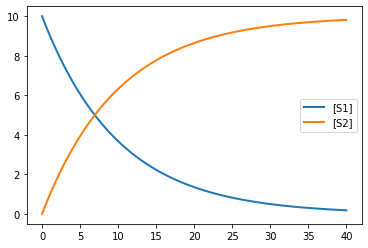

In [2]:
# Simple model
r = te.loada ('''
S1 -> S2; k1*S1;
k1 = 0.1; S1 = 10; S2 = 0
''')
result = r.simulate (0, 40, 100)
r.plot ()

**Example 2 (Multiple Reactions)**

\begin{equation}
\frac{\mathrm{d}[S1]}{\mathrm{d}t}=-k_1 S_1 \\
\frac{\mathrm{d}[S2]}{\mathrm{d}t}=k_1 S_1 - k_2 S_2 \\
\frac{\mathrm{d}[S3]}{\mathrm{d}t}=k_2 S_2 \\
\end{equation}

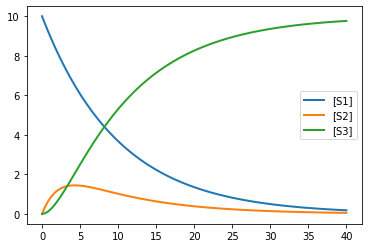

In [3]:
r = te.loada ('''
S1 -> S2; k1*S1;
S2 -> S3; k2*S2;

k1 = 0.1; k2 = 0.45;
S1 = 10; S2 = 0; S3 = 0
''')
result = r.simulate (0, 40, 100)
r.plot ()

**Example 3 (Rate Laws)**

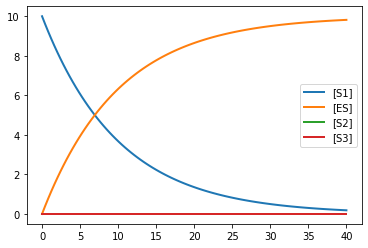

In [4]:
r = te.loada ('''
S1 -> ES; k1*S1 - k2*S2; # Reversible
S2 -> S3; Vmax*S3/(Km + S3); # Michaelis-Menten
k1 = 0.1; k2 = 0.2; Vmax = 10; Km = 0.4
S1 = 10; S2 = 0; S3 = 0

''')
result = r.simulate (0, 40, 100)
r.plot ()

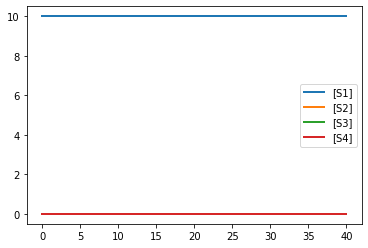

In [5]:
#Example (Bimolecular Reactions)
r = te.loada ('''
S1 + S2 -> S3; k1*S1*S2;
S3 -> S4 + S4; k2*S3;
k1 = 0.1; k2 = 0.2;
S1 = 10; S2 = 0; S3 = 0
''')
result = r.simulate (0, 40, 100)
r.plot ()

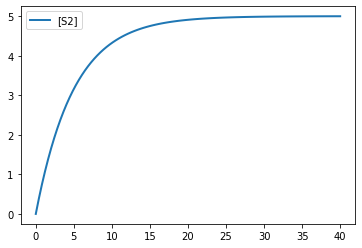

In [6]:
#Example (Fixed Species)
r = te.loada ('''
# This is a comment
# A $ means FIX the concentration of the species
$S1 -> S2; k1*S1;
S2 -> $S3; k2*S2;
k1 = 0.1; k2 = 0.2;
S1 = 10; S2 = 0; S3 = 0
''')
result = r.simulate (0, 40, 100)
r.plot ()

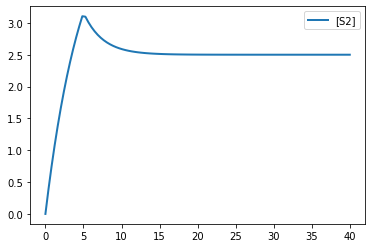

In [7]:
#Example (Events)
r = te.loada ('''
# This is a comment
# A $ means FIX the concentration of the species
$S1 -> S2; k1*S1;
S2 -> $S3; k2*S2;
at (time > 5): k2 = k2*2;
k1 = 0.1; k2 = 0.2;
S1 = 10; S2 = 0; S3 = 0
''')
result = r.simulate (0, 40, 100)
r.plot ()

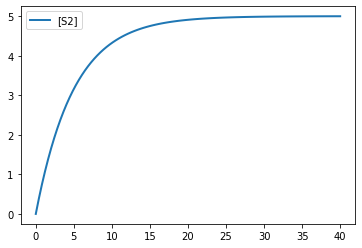

In [8]:
#Example (Named Reactions)
r = te.loada ('''
# Name reactions are useful for getting the reaction rates
J1: $S1 -> S2; k1*S1;
J2: S2 -> $S3; k2*S2;
k1 = 0.1; k2 = 0.2;
S1 = 10; S2 = 0; S3 = 0
''')
result = r.simulate (0, 40, 100)
r.plot ()

## Define Reactions
Before starting the model, we should define the reaction first.

### Arabinose-Induced Protein Expression*
_This example is taken from http://2017.igem.org/Team:Peking/Model#Flip-flop_

Arabinose-induced promoter (pBAD) for the expression of hcnABC can be modelled as:



\begin{array}
((AraB:AraC) \xrightarrow[]{K_{transcription}} mRNA \xrightarrow[]{K_{translation}} hcnABC \\
mRNA \xrightarrow[]{\gamma_{mRNA}} \emptyset \\
hcnABC \xrightarrow[]{\gamma_{prot}} \emptyset \\
\end{array}


The promoter pBAD binds to AraC and this represses transcription of mRNA. Arabinose will bind to AraC and form the Arab:AraC compound, allowing transcription to occur.

We assume that:
* AraC is always in large concentration
* AraC binding to arabinose occurs on a faster time scale to transcription

Therefore it is not necessary to consider individual concentrations of arabinose and AraC. We need only include the concentration of (Arab:AraC) complex in the model. The transcription rate constant K on the schematic diagram above is not a simple constant but described as a Michaelis-Mentin kinetics equation below.

\begin{equation}
\frac{\mathrm{d}[mRNA]}{\mathrm{d}t}=K_{max}\frac{[Arab:AraC]^n}{[Arab:AraC]^n+K_{half}^n}-\gamma_{mRNA}[mRNA]
\end{equation}